In [1]:
import pandas as pd
import numpy as np

#Q1:

N=50000
url= "https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt"
df= pd.read_csv(url)
# df = pd.read_csv("data_000637.txt", nrows=N)
print(df)

ParserError: Error tokenizing data. C error: Expected 1 fields in line 3, saw 2


In [2]:
#Q2:

print("There are {} BX in an ORBIT".format(df['BX_COUNTER'].max()))

There are 3563 BX in an ORBIT


In [3]:
#Q3:

import time as time

start = time.time()
df0 = pd.read_csv("data_000637.txt")
end = time.time()
print("It takes {} S to read all the data".format(end-start))

It takes 0.4986279010772705 S to read all the data


In [4]:
#Q4:

# time= ORbit_CNT * 3563 * 25 + Bx_counter * 25 + tdc_meas * (25/30)

Time=[25*((df['ORBIT_CNT'][i])*3563 + (df['BX_COUNTER'][i]) + (df['TDC_MEAS'][i])*(1/30))  for i in range(N)]

df1 = df.assign(A_T=pd.Series(np.array(Time)).values)
print(df1)

       HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS           A_T
0         1     0          123  3869200167        2374        26  3.446490e+14
1         1     0          124  3869200167        2374        27  3.446490e+14
2         1     0           63  3869200167        2553        28  3.446490e+14
3         1     0           64  3869200167        2558        19  3.446490e+14
4         1     0           64  3869200167        2760        25  3.446490e+14
...     ...   ...          ...         ...         ...       ...           ...
49995     1     1            2  3869200664        1103         4  3.446490e+14
49996     1     1            4  3869200664        1105        14  3.446490e+14
49997     1     0           59  3869200664        1191        17  3.446490e+14
49998     1     0           32  3869200664        1191         1  3.446490e+14
49999     1     0           60  3869200664        1190         6  3.446490e+14

[50000 rows x 7 columns]


In [5]:
#Q5:

df2=df1
df2['HEAD']= [np.random.choice([1,0]) for i in range(N)] 
print(df2)

       HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS           A_T
0         0     0          123  3869200167        2374        26  3.446490e+14
1         1     0          124  3869200167        2374        27  3.446490e+14
2         1     0           63  3869200167        2553        28  3.446490e+14
3         0     0           64  3869200167        2558        19  3.446490e+14
4         1     0           64  3869200167        2760        25  3.446490e+14
...     ...   ...          ...         ...         ...       ...           ...
49995     0     1            2  3869200664        1103         4  3.446490e+14
49996     1     1            4  3869200664        1105        14  3.446490e+14
49997     0     0           59  3869200664        1191        17  3.446490e+14
49998     1     0           32  3869200664        1191         1  3.446490e+14
49999     1     0           60  3869200664        1190         6  3.446490e+14

[50000 rows x 7 columns]


In [6]:
#Q6:

df3 = df2.drop([i for i in range(N) if df2['HEAD'][i]==0])
print(df3)

       HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS           A_T
1         1     0          124  3869200167        2374        27  3.446490e+14
2         1     0           63  3869200167        2553        28  3.446490e+14
4         1     0           64  3869200167        2760        25  3.446490e+14
7         1     0          139  3869200167        2776         0  3.446490e+14
8         1     0           62  3869200167        2774        21  3.446490e+14
...     ...   ...          ...         ...         ...       ...           ...
49990     1     1           52  3869200664        1097        12  3.446490e+14
49991     1     1            4  3869200664        1094         4  3.446490e+14
49996     1     1            4  3869200664        1105        14  3.446490e+14
49998     1     0           32  3869200664        1191         1  3.446490e+14
49999     1     0           60  3869200664        1190         6  3.446490e+14

[25050 rows x 7 columns]


<Figure size 432x288 with 0 Axes>

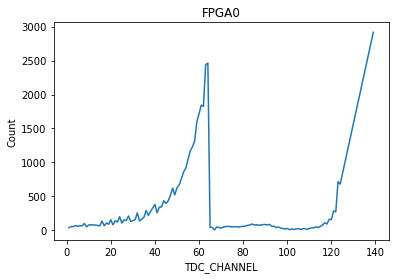

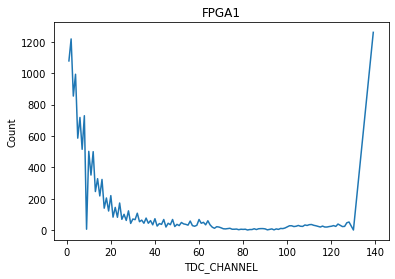

<Figure size 432x288 with 0 Axes>

In [7]:
#Q7:

import matplotlib.pyplot as plt

CH1= [df2['TDC_CHANNEL'][i] for i in range(N) if df2['FPGA'][i] == 0]
CH1.sort()

Counter1=[]
Channels1=[]

for i in range(len(CH1)):
    if CH1[i] not in Channels1:
        Counter1.append(CH1.count(CH1[i]))
        Channels1.append(CH1[i])
    else: continue


plt.plot(Channels1, Counter1)
plt.xlabel('TDC_CHANNEL')
plt.ylabel('Count')
plt.title('FPGA0')
plt.figure()

    
CH2= [df2['TDC_CHANNEL'][i] for i in range(N) if df2['FPGA'][i] == 1]
CH2.sort()

Counter2=[]
Channels2=[]

for i in range(len(CH2)):
    if CH2[i] not in Channels2:
        Counter2.append(CH2.count(CH2[i]))
        Channels2.append(CH2[i])
    else: continue
        
plt.plot(Channels2, Counter2)
plt.xlabel('TDC_CHANNEL')
plt.ylabel('Count')
plt.title('FPGA1')
plt.figure()

In [8]:
#Q8:

"""In this exercise we use the initial unmodified data in which 
all the values of HEAD column is equal to 0. Therefore by using groupby method and 
the function sum() we can obtain the count for each TDC_Channel"""

TDC_Count = df.groupby('TDC_CHANNEL').sum()
print(TDC_Count['HEAD'])

#now we should find the top 3 in the HEAD column
print("\n")
T_C=list(TDC_Count['HEAD'])
temp=T_C.copy()
temp.sort(reverse=True)
max_TDC_count= temp[:3]
max_TDC_index=[T_C.index(temp[i]) for i in range(3)]

print("The TDC_channels with index: {} have maximum number counts which are listed as {}".format(max_TDC_index,max_TDC_count))

TDC_CHANNEL
1      1118
2      1274
3       911
4      1065
5       645
       ... 
126      24
127      47
128      52
130       1
139    4175
Name: HEAD, Length: 130, dtype: int64


The TDC_channels with index: [129, 63, 62] have maximum number counts which are listed as [4175, 2523, 2472]


In [9]:
#Q9:

print("Number of unique orbits is:", len(set(list(df2["ORBIT_CNT"]))))
print("Number of unique orbits with at least one measurement from TDC_CHANNEL=139 is:", len(set(list(df2[df2["ORBIT_CNT"]==139]))))

Number of unique orbits is: 498
Number of unique orbits with at least one measurement from TDC_CHANNEL=139 is: 7
